In [1]:
print('Ritu')

Ritu


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(iris['data'],columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target_names'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_names       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


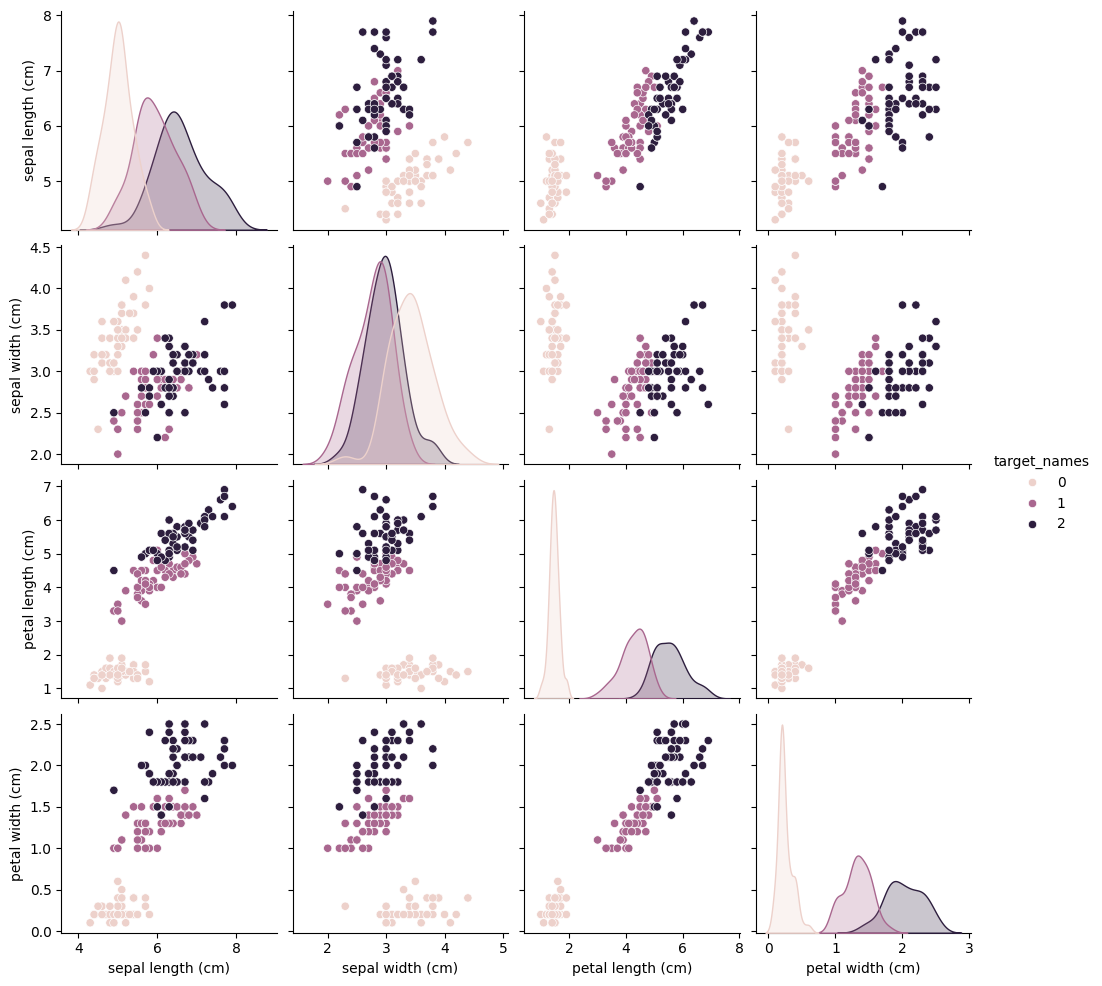

In [8]:
sns.pairplot(df,hue= 'target_names')

In [9]:
df1 = df[df['target_names'] !=0]
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df1.target_names.unique()

array([1, 2])

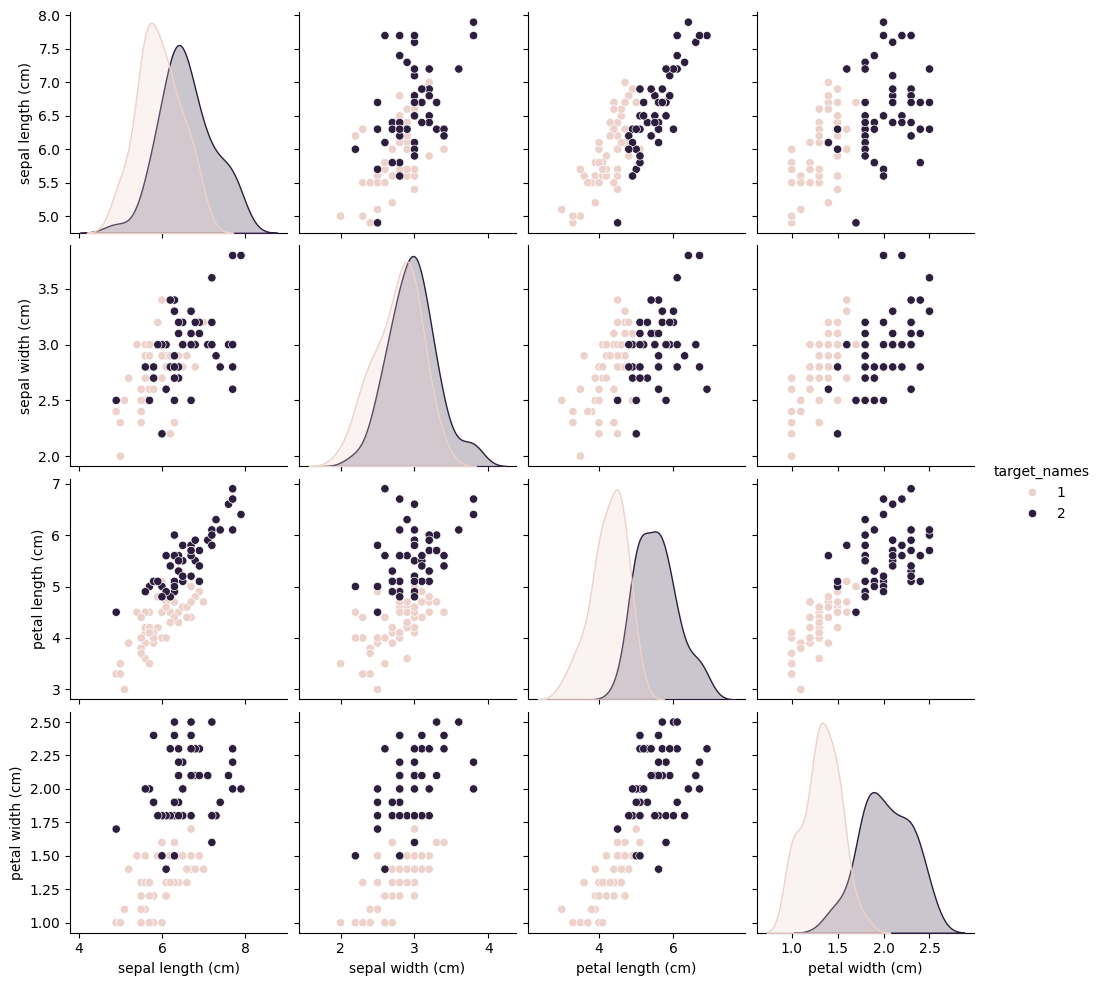

In [11]:
sns.pairplot(df1,hue = 'target_names')

In [12]:
X = df1.drop('target_names',axis= 1)
y = df1.target_names

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.23,random_state = 32001)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 4)
(23, 4)
(77,)
(23,)


In [14]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform(X_test) 

In [15]:
pd.DataFrame(X_train).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,77.000000,77.000000,77.000000,77.000000
mean,6.211688,2.863636,4.828571,1.629870
std,0.662724,0.301710,0.796845,0.405575
min,4.900000,2.200000,3.000000,1.000000
25%,5.700000,2.700000,4.300000,1.300000
50%,6.100000,2.900000,4.800000,1.500000
75%,6.600000,3.000000,5.300000,1.900000
max,7.900000,3.800000,6.700000,2.500000


In [16]:
pd.DataFrame(X_train_sc).describe()

,0,1,2,3
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-6.827151e-16,-3.518109e-16,-1.917297e-15,2.073378e-15
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-1.992215e+00,-2.214010e+00,-2.309811e+00,-1.563215e+00
25%,-7.771611e-01,-5.459202e-01,-6.676798e-01,-8.186736e-01
50%,-1.696342e-01,1.213156e-01,-3.609080e-02,-3.223124e-01
75%,5.897746e-01,4.549335e-01,5.954982e-01,6.704099e-01
max,2.564237e+00,3.123877e+00,2.363947e+00,2.159493e+00


In [17]:
modelNB = MultinomialNB()
modelKNN = KNeighborsClassifier()
modelRF = RandomForestClassifier()

In [18]:
estimators = [('modelNB',modelNB),('modelKNN',modelKNN),('modelRF',modelRF)]

In [25]:
for estimator in estimators:
    print(estimator[0],np.mean(cross_val_score(estimator[1],X,y,cv = 10,scoring = 'accuracy')))

modelNB 0.93
modelKNN 0.95
modelRF 0.95


In [26]:
model  = VotingClassifier(estimators = estimators,voting = 'hard')
print(np.mean(cross_val_score(model,X,y,cv = 10,scoring = 'accuracy')))

0.95


In [27]:
model1 = VotingClassifier(estimators = estimators, voting = 'soft')
print(np.mean(cross_val_score(model1,X,y,scoring = 'accuracy',cv = 10)))

0.9400000000000001


In [29]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            model3 = VotingClassifier(estimators = estimators,voting = 'soft',weights = [i,j,k])
            print(f'i : {i} j : {j} k : {k} score : {np.mean(cross_val_score(model3,X,y,scoring = 'accuracy',cv = 10))} ')

i : 1 j : 1 k : 1 score : 0.9400000000000001 
i : 1 j : 1 k : 2 score : 0.95 
i : 1 j : 1 k : 3 score : 0.9400000000000001 
i : 1 j : 2 k : 1 score : 0.9400000000000001 
i : 1 j : 2 k : 2 score : 0.9400000000000001 
i : 1 j : 2 k : 3 score : 0.9400000000000001 
i : 1 j : 3 k : 1 score : 0.9400000000000001 
i : 1 j : 3 k : 2 score : 0.9400000000000001 
i : 1 j : 3 k : 3 score : 0.93 
i : 2 j : 1 k : 1 score : 0.9400000000000001 
i : 2 j : 1 k : 2 score : 0.9400000000000001 
i : 2 j : 1 k : 3 score : 0.9400000000000001 
i : 2 j : 2 k : 1 score : 0.9400000000000001 
i : 2 j : 2 k : 2 score : 0.9400000000000001 
i : 2 j : 2 k : 3 score : 0.9400000000000001 
i : 2 j : 3 k : 1 score : 0.95 
i : 2 j : 3 k : 2 score : 0.9400000000000001 
i : 2 j : 3 k : 3 score : 0.9400000000000001 
i : 3 j : 1 k : 1 score : 0.9400000000000001 
i : 3 j : 1 k : 2 score : 0.9400000000000001 
i : 3 j : 1 k : 3 score : 0.95 
i : 3 j : 2 k : 1 score : 0.9400000000000001 
i : 3 j : 2 k : 2 score : 0.9400000000000001

In [31]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            model3 = VotingClassifier(estimators = estimators,voting = 'hard',weights = [i,j,k])
            print(f'i : {i} j : {j} k : {k} score : {np.mean(cross_val_score(model3,X,y,scoring = 'accuracy',cv = 10))} ')

i : 1 j : 1 k : 1 score : 0.95 
i : 1 j : 1 k : 2 score : 0.95 
i : 1 j : 1 k : 3 score : 0.95 
i : 1 j : 2 k : 1 score : 0.95 
i : 1 j : 2 k : 2 score : 0.9400000000000001 
i : 1 j : 2 k : 3 score : 0.9400000000000001 
i : 1 j : 3 k : 1 score : 0.95 
i : 1 j : 3 k : 2 score : 0.9400000000000001 
i : 1 j : 3 k : 3 score : 0.95 
i : 2 j : 1 k : 1 score : 0.93 
i : 2 j : 1 k : 2 score : 0.9400000000000001 
i : 2 j : 1 k : 3 score : 0.9400000000000001 
i : 2 j : 2 k : 1 score : 0.9400000000000001 
i : 2 j : 2 k : 2 score : 0.9400000000000001 
i : 2 j : 2 k : 3 score : 0.95 
i : 2 j : 3 k : 1 score : 0.9400000000000001 
i : 2 j : 3 k : 2 score : 0.9400000000000001 
i : 2 j : 3 k : 3 score : 0.95 
i : 3 j : 1 k : 1 score : 0.93 
i : 3 j : 1 k : 2 score : 0.93 
i : 3 j : 1 k : 3 score : 0.9400000000000001 
i : 3 j : 2 k : 1 score : 0.93 
i : 3 j : 2 k : 2 score : 0.95 
i : 3 j : 2 k : 3 score : 0.95 
i : 3 j : 3 k : 1 score : 0.95 
i : 3 j : 3 k : 2 score : 0.95 
i : 3 j : 3 k : 3 score : 0.

In [ ]:
model2 = VotingClassifier(estimators = estimators)

In [ ]:
param_grid = {
    'logistic__C':[0.01,0.1],
}